# Ищем петли с extrusion track

In [154]:
!pip install cooler 

    100% |████████████████████████████████| 102kB 1.4MB/s a 0:00:011
    100% |████████████████████████████████| 1.4MB 793kB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 6.4MB/s eta 0:00:01
    100% |████████████████████████████████| 153kB 2.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyfaidx ... done
  Stored in directory: /Users/victoria/Library/Caches/pip/wheels/54/a2/b4/e242e58d23b2808e191b214067880faa46cd2341f363886e0b
  Running setup.py bdist_wheel for asciitree ... done
  Stored in directory: /Users/victoria/Library/Caches/pip/wheels/1d/d9/58/9808b306744df0208fccc640d3d9952a5bc7468502d42897d5
  Running setup.py bdist_wheel for multiprocess ... done
  Stored in directory: /Users/victoria/Library/Caches/pip/wheels/3a/ed/51/77c833462c3e757ce50c4b2b68bdf53f5d1745542fe567d740
  Running setup.py bdist_wheel for pypairix ... done
  Stored in directory: /Users/victoria/Library/Caches/pip/wheels/5d/c5/3d/b4d3a2f1c16fc4f5556e8d7891e448ef3701e2aabaa742d9f9
  Runni

In [55]:
import pandas as pd
import numpy as np
import h5py
import cooler
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dr = '../data/sum_per_bin/dicty_sum_per_bin.'
filename = dr + '1000.tsv'
bins_1000 = pd.read_csv(filename, sep='\t')
filename = dr + '2000.tsv'
bins_2000 = pd.read_csv(filename, sep='\t')
filename = dr + '3000.tsv'
bins_3000 = pd.read_csv(filename, sep='\t')

In [3]:
bins_2000.head()

,chr,start,8A,8B,5B,0B,2A,0A,5A,2B
0,chr1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,chr1,2000,0.28,0.62,0.41,0.65,0.91,0.73,0.70,0.89
2,chr1,4000,0.62,0.89,0.73,0.70,0.55,0.73,0.74,0.97
3,chr1,6000,0.82,0.75,0.75,0.78,0.48,0.84,0.64,0.77
4,chr1,8000,0.88,0.49,0.86,0.83,0.78,0.65,0.76,0.80


In [3]:
loops_info = pd.read_excel('../data/dicty_loop_positions_Chr1_Chr6.xlsx')

In [94]:
# Cдвиг разметки left-1, right-1
loops_info['Genomic bin, Left base'] = loops_info['Genomic bin, Left base'] - 1
loops_info['Genomic bin, Right base'] = loops_info['Genomic bin, Right base'] - 1

In [95]:
left_extrusion_loops = loops_info[loops_info['"Extrusion track"'] == 1]#['Genomic bin, Left base'].values
right_extrusion_loops = loops_info[loops_info['"Extrusion track"'] == 2]#['Genomic bin, Right base'].values
no_extrusion_loops = loops_info[loops_info['"Extrusion track"'] == 0]

In [5]:
len(loops_info), len(left_extrusion_loops), len(right_extrusion_loops), len(no_extrusion_loops)

(241, 88, 65, 88)

In [189]:
loops_info.head()

,Chr,ID,"Genomic bin, Left base","Genomic bin, Right base",Size (Kb),"""Extrusion track""","Note for extrusion tracks: 0=n/a, 1=from the left base, 2=from the right base"
0,1,1,107,114,16,0,NaN
1,1,2,114,123,20,1,NaN
2,1,3,176,187,24,2,NaN
3,1,4,187,194,16,0,NaN
4,1,5,194,209,32,2,NaN


In [6]:
positions = left_extrusion_loops['Genomic bin, Left base'].values
#positions = np.append(positions, right_extrusion_loops['Genomic bin, Right base'].values)
positions = [p*2000 for p in positions]

In [7]:
left_extrusion_loops = left_extrusion_loops.sort_values(by=['Chr','Genomic bin, Left base'], ascending=[True, True])
left_extrusion_loops

,Chr,ID,"Genomic bin, Left base","Genomic bin, Right base",Size (Kb),"""Extrusion track""","Note for extrusion tracks: 0=n/a, 1=from the left base, 2=from the right base"
1,1,2,114,123,20,1,NaN
6,1,7,209,215,14,1,NaN
7,1,8,226,239,28,1,NaN
8,1,9,239,253,30,1,NaN
11,1,12,282,293,24,1,NaN
12,1,13,293,304,24,1,NaN
14,1,15,314,329,32,1,NaN
15,1,16,384,394,22,1,NaN
21,1,22,505,515,22,1,NaN
28,1,29,607,615,18,1,NaN


### Читаем cool файлы

In [428]:
!pip install bx-python

    100% |████████████████████████████████| 1.3MB 36kB/s ta 0:00:013
  Running setup.py bdist_wheel for bx-python ... done
  Stored in directory: /Users/victoria/Library/Caches/pip/wheels/1f/87/ae/fb6f8ae0a0703ad2694dedba0e2efaac4b494e229bd954a3ad
Successfully built bx-python
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [434]:
!pip install https://bitbucket.org/mirnylab/mirnylib/get/tip.tar.gz

     \ 102kB 708kB/s
  Running setup.py install for mirnylib ... error
    Complete output from command /Users/victoria/anaconda2/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/xd/k3y1yfc155sgrb57qgmn74jh0000gn/T/pip-BOxTkk-build/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /var/folders/xd/k3y1yfc155sgrb57qgmn74jh0000gn/T/pip-Y0x09m-record/install-record.txt --single-version-externally-managed --compile:
    running install
    running build
    running build_py
    creating build
    creating build/lib.macosx-10.6-x86_64-2.7
    creating build/lib.macosx-10.6-x86_64-2.7/mirnylib
    copying mirnylib/numutils.py -> build/lib.macosx-10.6-x86_64-2.7/mirnylib
    copying mirnylib/plotting.py -> build/lib.macosx-10.6-x86_64-2.7/mirnylib
    copying mirnylib/__init__.py -> build/lib.macosx-10.6-x86_64-2.7/mirnylib
    copying mirnylib/h5dict.py -> buil

In [56]:
def logbinsnew(a, b, ratio=0, N=0):
    a = int(a)
    b = int(b)
    a10, b10 = np.log10([a, b])
    if ratio != 0:
        if N != 0:
            raise ValueError("Please specify N or ratio")
        N = np.log(b / a) / np.log(ratio)
    elif N == 0:
        raise ValueError("Please specify N or ratio")
    data10 = np.logspace(a10, b10, N)
    data10 = np.array(np.rint(data10), dtype=int)
    data10 = np.sort(np.unique(data10))
    assert data10[0] == a
    assert data10[-1] == b
    return data10

def observedOverExpected(matrix):
    "Calculates observedOverExpected of any contact map. Ignores NaNs"

    #i, j, k, start, end, count, offset
    #x, ss, meanss

    data = np.array(matrix, dtype=np.double, order="C")
    N = data.shape[0]
    
    _bins = logbinsnew(1, N, 1.03)
    _bins = [(0, 1)] + [(_bins[i], _bins[i+1]) for i in range(len(_bins) - 1)]
    bins = np.array(_bins, dtype=np.int64, order="C")
    M = bins.shape[0]
    
    for k in range(M):
        start, end = bins[k, 0], bins[k, 1]
        ss = 0
        count = 0
        for offset in range(start, end):
            for j in range(0, N - offset):
                x = data[offset + j, j]
                if np.isnan(x):
                    continue
                ss += x
                count += 1
        
        meanss = ss / count
        if meanss != 0:
            for offset in range(start,end):
                for j in range(0,N-offset):
                    data[offset + j, j] /= meanss
                    if offset > 0: data[j, offset+j] /= meanss
    return data

In [57]:
def norm_m(m):
    n = len(m)
    normed_m = [[0]*n]*n
    for i in range(0, n):
        diag = np.diag(m, k=i)
        diag_mean = np.mean(diag)
        diag = diag / diag_mean
        normed_m = normed_m + np.diagflat(diag, k=i)
        if ((n % 2 == 1) and (i == 0)):
            continue
        normed_m = normed_m + np.diagflat(diag, k=-i)
    return normed_m

In [12]:
filename = '../data/Hi-C/Dicty_0A.1000.cool.multires'
h5 = h5py.File(filename, 'r')
c = cooler.Cooler(h5['resolutions']['2000'])
tmp_mtx = c.matrix(balance=True, as_pixels=False)
tmp_mtx_chr1 = np.nan_to_num(tmp_mtx.fetch('chr1')) #np.nan_to_num(tmp_mtx.fetch('chr1'))


In [13]:
mtx_chr1 = np.array(tmp_mtx_chr1)
normed_mtx_chr1 = norm_m(mtx_chr1)
normed_mtx = observedOverExpected(mtx_chr1)

/Users/victoria/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


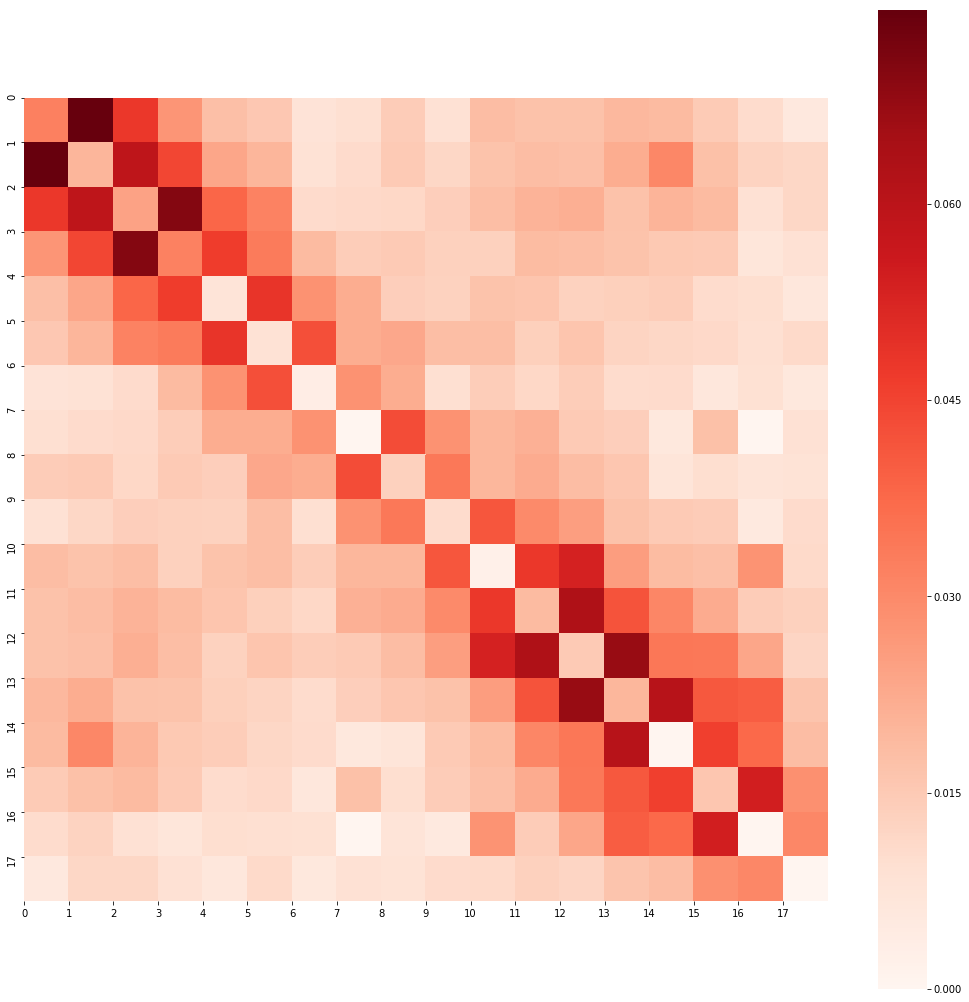

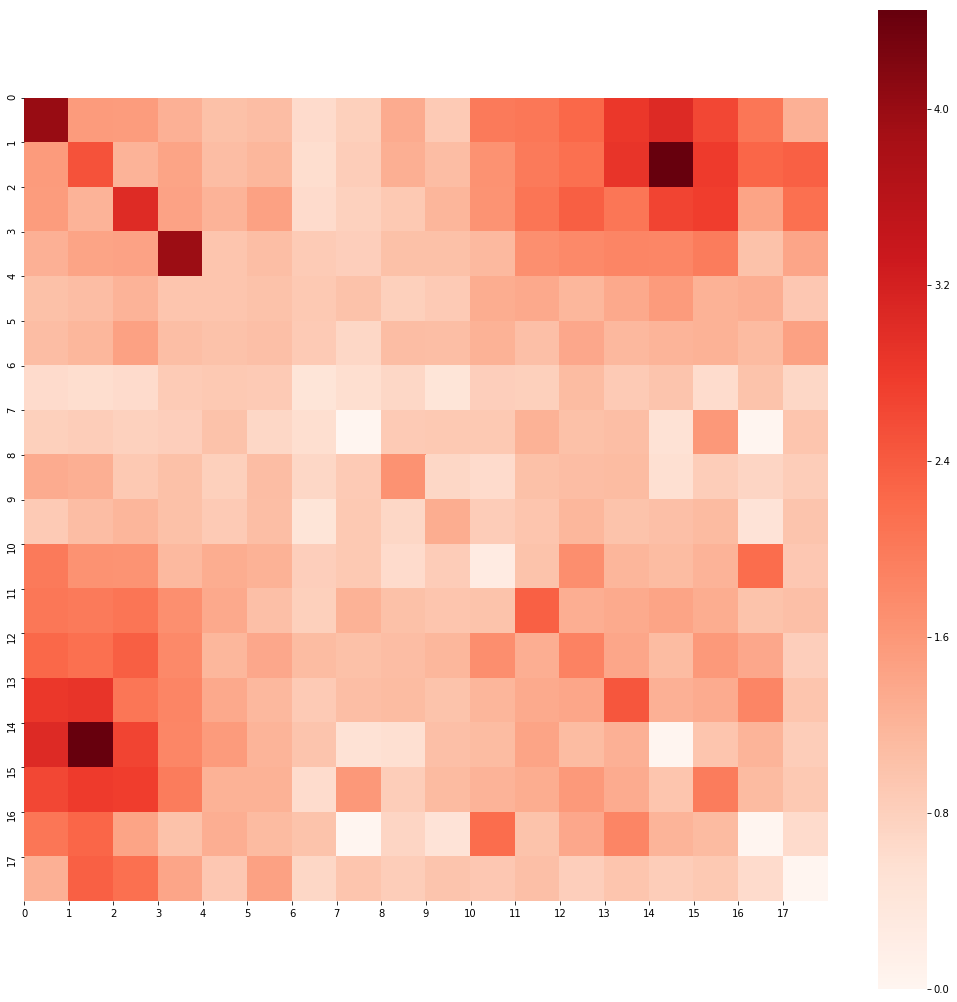

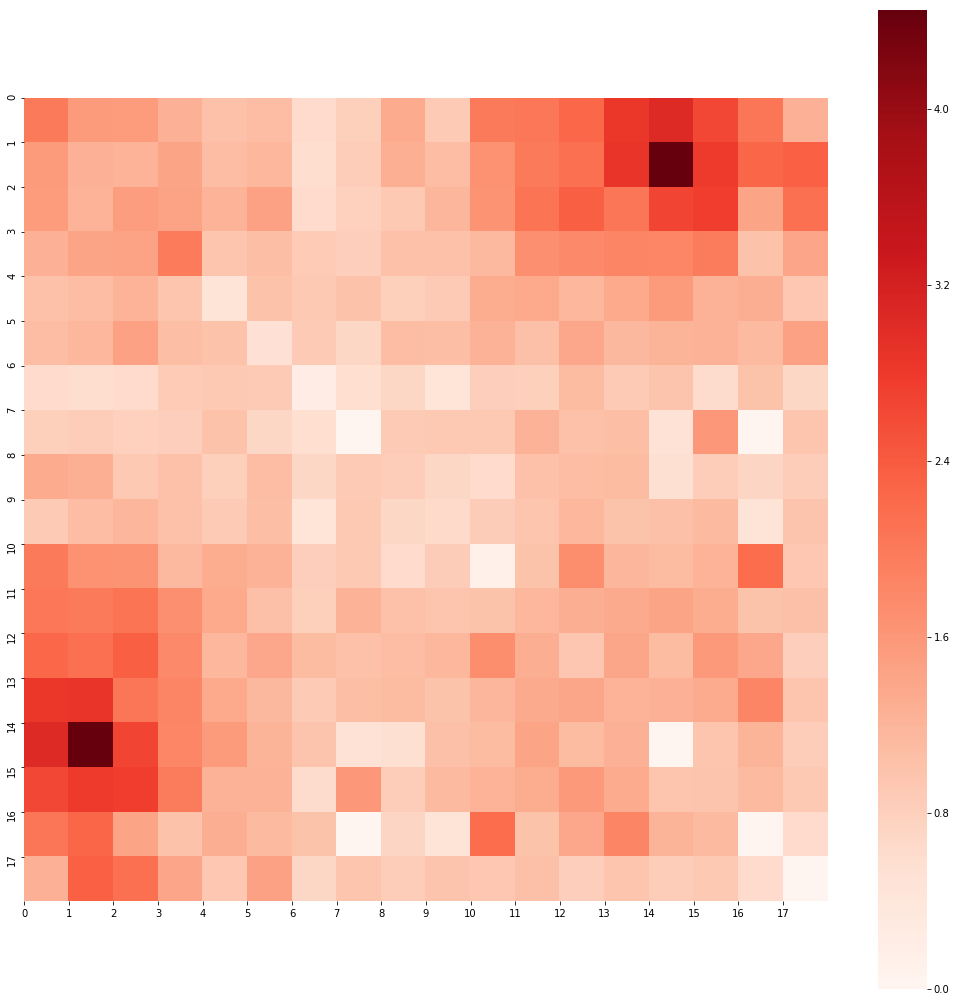

In [21]:
left = 274 + 18
right = left+16#50
n = right-left+2
chr_mtx = mtx_chr1
chr_mtx_2 = np.array(chr_mtx)[left-1:right+1, left-1:right+1] #chr_mtx[left-1:right+1, left-1:right+1] #  [left-1, right]
plt.figure(figsize=[n, n])
sns.heatmap(chr_mtx_2, cmap='Reds', vmax=np.max(chr_mtx_2), vmin=np.min(chr_mtx_2), square=True)
plt.yticks(np.arange(n), np.arange(n))
plt.xticks(np.arange(n), np.arange(n))
plt.show()

chr_mtx = normed_mtx_chr1
chr_mtx_2 = np.array(chr_mtx)[left-1:right+1, left-1:right+1] #chr_mtx[left-1:right+1, left-1:right+1] #  [left-1, right]

plt.figure(figsize=[n, n])
sns.heatmap(chr_mtx_2, cmap='Reds', vmax=np.max(chr_mtx_2), vmin=np.min(chr_mtx_2), square=True)
plt.yticks(np.arange(n), np.arange(n))
plt.xticks(np.arange(n), np.arange(n))
plt.show()

chr_mtx = normed_mtx
chr_mtx_2 = np.array(chr_mtx)[left-1:right+1, left-1:right+1] #chr_mtx[left-1:right+1, left-1:right+1] #  [left-1, right]

plt.figure(figsize=[n, n])
sns.heatmap(chr_mtx_2, cmap='Reds', vmax=np.max(chr_mtx_2), vmin=np.min(chr_mtx_2), square=True)
plt.yticks(np.arange(n), np.arange(n))
plt.xticks(np.arange(n), np.arange(n))
plt.show()

In [58]:
dr = '../data/Hi-C/'
mtx_chr1 = []
mtx_chr2 = []
mtx_chr3 = []
mtx_chr4 = []
mtx_chr5 = []
mtx_chr6 = []
not_initialized = True

for filename in os.listdir(dr):
    filename = dr + filename
    h5 = h5py.File(filename, 'r')
    c = cooler.Cooler(h5['resolutions']['2000'])
    tmp_mtx = c.matrix(balance=True, as_pixels=False)
    tmp_mtx_chr1 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr1'))) #np.nan_to_num(tmp_mtx.fetch('chr1'))
    tmp_mtx_chr2 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr2'))) #np.nan_to_num(tmp_mtx.fetch('chr2'))
    tmp_mtx_chr3 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr3'))) #np.nan_to_num(tmp_mtx.fetch('chr3'))
    tmp_mtx_chr4 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr4'))) #np.nan_to_num(tmp_mtx.fetch('chr4'))
    tmp_mtx_chr5 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr5'))) #np.nan_to_num(tmp_mtx.fetch('chr5'))
    tmp_mtx_chr6 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr6'))) #np.nan_to_num(tmp_mtx.fetch('chr6'))
    print filename[filename.rfind('/')+1 : filename.rfind('/') + 9], np.max(tmp_mtx_chr1), \
        np.max(tmp_mtx_chr2), np.max(tmp_mtx_chr3), np.max(tmp_mtx_chr4), \
        np.max(tmp_mtx_chr5), np.max(tmp_mtx_chr6)
    if (not_initialized):
        mtx_chr1 = [np.array([0] * tmp_mtx_chr1.shape[1])] * tmp_mtx_chr1.shape[0]
        mtx_chr2 = [np.array([0] * tmp_mtx_chr2.shape[1])] * tmp_mtx_chr2.shape[0]
        mtx_chr3 = [np.array([0] * tmp_mtx_chr3.shape[1])] * tmp_mtx_chr3.shape[0]
        mtx_chr4 = [np.array([0] * tmp_mtx_chr4.shape[1])] * tmp_mtx_chr4.shape[0]
        mtx_chr5 = [np.array([0] * tmp_mtx_chr5.shape[1])] * tmp_mtx_chr5.shape[0]
        mtx_chr6 = [np.array([0] * tmp_mtx_chr6.shape[1])] * tmp_mtx_chr6.shape[0]
        not_initialized = False
    mtx_chr1 = [sum(x) for x in zip(mtx_chr1, tmp_mtx_chr1)]
    mtx_chr2 = [sum(x) for x in zip(mtx_chr2, tmp_mtx_chr2)]
    mtx_chr3 = [sum(x) for x in zip(mtx_chr3, tmp_mtx_chr3)]
    mtx_chr4 = [sum(x) for x in zip(mtx_chr4, tmp_mtx_chr4)]
    mtx_chr5 = [sum(x) for x in zip(mtx_chr5, tmp_mtx_chr5)]
    mtx_chr6 = [sum(x) for x in zip(mtx_chr6, tmp_mtx_chr6)]
    
mtx_chr1 = [x / 8 for x in mtx_chr1]
mtx_chr2 = [x / 8 for x in mtx_chr2]
mtx_chr3 = [x / 8 for x in mtx_chr3]
mtx_chr4 = [x / 8 for x in mtx_chr4]
mtx_chr5 = [x / 8 for x in mtx_chr5]
mtx_chr6 = [x / 8 for x in mtx_chr6]

Dicty_5B 1037.1175973492414 1216.4099278999063 564.4444133901668 602.2715517840988 619.1793324750959 409.3212050485649
Dicty_2A 982.5290990986255 1362.3109755028038 628.5833892125289 798.7279944037692 687.1489969007049 484.4881392430732
Dicty_0A 435.7244341410681 1547.7346274083716 499.45964246658724 374.7606241205607 1417.549495495216 516.1327382442907
Dicty_0B 1120.869816810184 643.0941956568396 413.7765088236333 322.9631756090361 1355.5326908435761 283.25899123529007
Dicty_2B 1030.7201543048586 864.6292878114522 636.1717711251692 734.8546177896256 644.1662784974857 482.32022105578284
Dicty_5A 1389.6563759722872 1278.7371121889664 597.2493154399942 1280.6255162669029 2247.7730208255034 655.6206530326248
Dicty_8A 959.8664319032823 739.0572484649465 746.8772222109085 813.3600423349332 1871.7215515176642 389.59268029861187
Dicty_8B 718.1954900503781 896.8219606303406 599.2039894848374 626.1484865881251 1122.1252394948629 476.85008342461083


In [63]:
left_extrusion_loops.head()

,Chr,ID,"Genomic bin, Left base","Genomic bin, Right base",Size (Kb),"""Extrusion track""","Note for extrusion tracks: 0=n/a, 1=from the left base, 2=from the right base"
1,1,2,114,123,20,1,NaN
6,1,7,209,215,14,1,NaN
7,1,8,226,239,28,1,NaN
8,1,9,239,253,30,1,NaN
11,1,12,282,293,24,1,NaN


In [64]:
right_extrusion_loops.head()

,Chr,ID,"Genomic bin, Left base","Genomic bin, Right base",Size (Kb),"""Extrusion track""","Note for extrusion tracks: 0=n/a, 1=from the left base, 2=from the right base"
2,1,3,176,187,24,2,NaN
4,1,5,194,209,32,2,NaN
5,1,6,201,209,18,2,NaN
13,1,14,306,314,18,2,NaN
16,1,17,404,411,16,2,NaN


In [61]:
# m - квадрат с петлей + 1 бин вверх (+1 бин вниз)
def mean_dif_up_bottom_bin(m, left_extrusion, only_upper=False, only_bottom=False):
    n = m.shape[1]
    if left_extrusion:
        upper_bins =  m[0][1 : n-1] # без диаг эл-та и вершины
        extrusion_track = m[1][1 : n-1] # левый катет без вершины
        bottom_bins =  m[2][1 : n-1]
    else:
        upper_bins =  m[n-3][1 : n-1]
        extrusion_track = m[n-2][1 : n-1] # правый катет без вершины
        bottom_bins =  m[n-1][1 : n-1]
    up_dif = np.subtract(extrusion_track, upper_bins) #np.abs(np.subtract(extrusion_track, upper_bins))
    bot_dif = np.subtract(extrusion_track, bottom_bins) #np.abs(np.subtract(extrusion_track, bottom_bins))
    if only_upper:
        return np.median(up_dif)
    if only_bottom:
        return np.median(bot_dif)
    up_bot_mean_dif = np.divide(np.add(up_dif,bot_dif), [2]*len(up_dif))
    return np.median(up_bot_mean_dif) #np.mean(up_bot_mean_dif)

In [62]:
def mean_dif_with_triangle_inner(m, left_extrusion):
    n = m.shape[1]
    mean_triangle = 0 # среднее по внутренности треугольника
    if left_extrusion:
        extrusion_track = m[0][1 : n] # первая строка (левый катет) без вершины и диаг. эл-та
        mean_triangle = (np.sum(m[1:n, 1:n]) - sum(np.diag(m[1:n, 1:n]))) \
        / (pow(n-2, 2)-(n-2))
    else:
        extrusion_track = m[n-1][1 : n] # послед строка==послед столбец (правый катет) без вершины и диаг. эл-та
        mean_triangle = (np.sum(m[1:n,1:n]) - sum(np.diag(m[1:n,1:n]))) \
                        / (pow(n-2, 2)-(n-2))
    if mean_triangle == 0:
        print 'Mean in triangle == 0'
    return np.median(extrusion_track - mean_triangle)#np.mean(abs(extrusion_track - mean_triangle))

Статистика по известным extrusion track-ам

In [ ]:
chr_mtrs= {1: mtx_chr1, 2: mtx_chr2, 3: mtx_chr3, 4: mtx_chr4, 5: mtx_chr5, 6: mtx_chr6}

In [93]:
def get_difs(chr_mtrs, left_extrusion_loops, right_extrusion_loops, loops_info, dif_with_triangle=False):
    left_extrusion_dif = []
    for _,row in left_extrusion_loops.iterrows():
        left = int(row['Genomic bin, Left base'])
        right = int(row['Genomic bin, Right base'])
        chrname = int(row['Chr'])
        chr_mtx = np.array(chr_mtrs[chrname])
        n = right - left
        if dif_with_triangle:
            dif = mean_dif_with_triangle_inner(chr_mtx[left:right+1,left:right+1], True)
        else:
            dif = mean_dif_up_bottom_bin(chr_mtx[left-1:right+1,left-1:right+1], True, True, False)
        left_extrusion_dif = np.append(left_extrusion_dif, dif)

    right_extrusion_dif = []
    for _,row in right_extrusion_loops.iterrows():
        left = int(row['Genomic bin, Left base'])
        right = int(row['Genomic bin, Right base'])
        chrname = int(row['Chr'])
        chr_mtx = np.array(chr_mtrs[chrname])
        n = right - left
        if dif_with_triangle:
            dif = mean_dif_with_triangle_inner(chr_mtx[left:right+1,left:right+1], False)
        else:
            dif = mean_dif_up_bottom_bin(chr_mtx[left:right+2,left:right+2], False, False, True)
        right_extrusion_dif = np.append(right_extrusion_dif, dif)

    not_extrusion_dif = []
    for _,row in loops_info.iterrows():
        left = int(row['Genomic bin, Left base'])
        right = int(row['Genomic bin, Right base'])
        chrname = int(row['Chr'])
        if (left in left_extrusion_loops[left_extrusion_loops['Chr'] == chrname]\
            ['Genomic bin, Left base'].values) or \
            (left in right_extrusion_loops[right_extrusion_loops['Chr'] == chrname]\
            ['Genomic bin, Left base'].values):
            continue
        chr_mtx = np.array(chr_mtrs[chrname])
        n = right - left
        if dif_with_triangle:
            dif_left_ex = mean_dif_with_triangle_inner(chr_mtx[left:right+1,left:right+1], True)
            dif_right_ex = mean_dif_with_triangle_inner(chr_mtx[left:right+1,left:right+1], False)
        else:
            dif_left_ex = mean_dif_up_bottom_bin(chr_mtx[left-1:right+1, left-1:right+1], True, True, False)
            dif_right_ex = mean_dif_up_bottom_bin(chr_mtx[left:right+2, left:right+2], False, False, True)
        not_extrusion_dif.append((dif_left_ex+dif_right_ex)/2)
        
    return left_extrusion_dif, right_extrusion_dif, not_extrusion_dif

In [87]:
left_extrusion_dif, right_extrusion_dif, not_extrusion_dif = get_difs(chr_mtrs, left_extrusion_loops, right_extrusion_loops, loops_info, False)

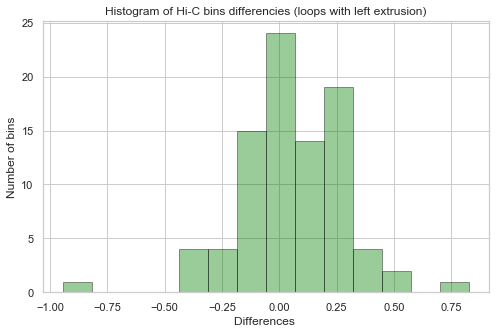

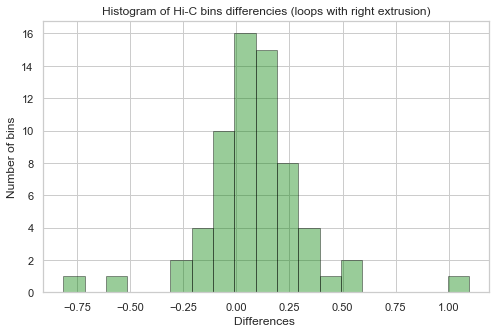

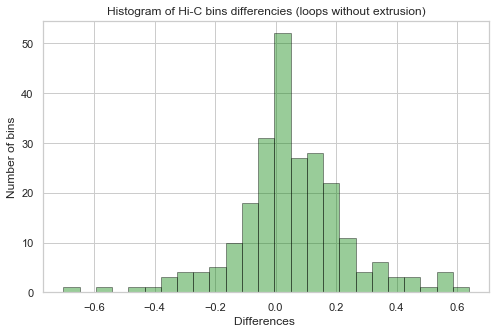

In [88]:
sns.set(style="whitegrid", rc = {'figure.figsize':(8,5)})
sns.distplot(left_extrusion_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (loops with left extrusion)')
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

sns.distplot(right_extrusion_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (loops with right extrusion)')
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

sns.distplot(not_extrusion_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (loops without extrusion)')
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

### Поиск extrusion track-ов по 0му часу

In [83]:
dr = '../data/Hi-C/'
mtx_0_chr1 = []
mtx_0_chr2 = []
mtx_0_chr3 = []
mtx_0_chr4 = []
mtx_0_chr5 = []
mtx_0_chr6 = []
not_initialized = True

for filename in ['A', 'B']:
    filename = dr + 'Dicty_0' + filename + '.1000.cool.multires'
    h5 = h5py.File(filename, 'r')
    c = cooler.Cooler(h5['resolutions']['2000'])
    tmp_mtx = c.matrix(balance=True, as_pixels=False)
    tmp_mtx_chr1 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr1')))
    tmp_mtx_chr2 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr2')))
    tmp_mtx_chr3 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr3')))
    tmp_mtx_chr4 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr4')))
    tmp_mtx_chr5 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr5')))
    tmp_mtx_chr6 = np.nan_to_num(observedOverExpected(tmp_mtx.fetch('chr6')))
    print filename[filename.rfind('/')+1 : filename.rfind('/') + 9], np.max(tmp_mtx_chr1), \
        np.max(tmp_mtx_chr2), np.max(tmp_mtx_chr3), np.max(tmp_mtx_chr4), \
        np.max(tmp_mtx_chr5), np.max(tmp_mtx_chr6)
    if (not_initialized):
        mtx_0_chr1 = [np.array([0] * tmp_mtx_chr1.shape[1])] * tmp_mtx_chr1.shape[0]
        mtx_0_chr2 = [np.array([0] * tmp_mtx_chr2.shape[1])] * tmp_mtx_chr2.shape[0]
        mtx_0_chr3 = [np.array([0] * tmp_mtx_chr3.shape[1])] * tmp_mtx_chr3.shape[0]
        mtx_0_chr4 = [np.array([0] * tmp_mtx_chr4.shape[1])] * tmp_mtx_chr4.shape[0]
        mtx_0_chr5 = [np.array([0] * tmp_mtx_chr5.shape[1])] * tmp_mtx_chr5.shape[0]
        mtx_0_chr6 = [np.array([0] * tmp_mtx_chr6.shape[1])] * tmp_mtx_chr6.shape[0]
        not_initialized = False
    mtx_0_chr1 = [sum(x) for x in zip(mtx_0_chr1, tmp_mtx_chr1)]
    mtx_0_chr2 = [sum(x) for x in zip(mtx_0_chr2, tmp_mtx_chr2)]
    mtx_0_chr3 = [sum(x) for x in zip(mtx_0_chr3, tmp_mtx_chr3)]
    mtx_0_chr4 = [sum(x) for x in zip(mtx_0_chr4, tmp_mtx_chr4)]
    mtx_0_chr5 = [sum(x) for x in zip(mtx_0_chr5, tmp_mtx_chr5)]
    mtx_0_chr6 = [sum(x) for x in zip(mtx_0_chr6, tmp_mtx_chr6)]
    
mtx_0_chr1 = [x/2 for x in mtx_0_chr1]
mtx_0_chr2 = [x/2 for x in mtx_0_chr2]
mtx_0_chr3 = [x/2 for x in mtx_0_chr3]
mtx_0_chr4 = [x/2 for x in mtx_0_chr4]
mtx_0_chr5 = [x/2 for x in mtx_0_chr5]
mtx_0_chr6 = [x/2 for x in mtx_0_chr6]

Dicty_0A 435.7244341410681 1547.7346274083716 499.45964246658724 374.7606241205607 1417.549495495216 516.1327382442907
Dicty_0B 1120.869816810184 643.0941956568396 413.7765088236333 322.9631756090361 1355.5326908435761 283.25899123529007


Сравнение с бинами сверху и снизу (по известным extrusion track-ам)

In [89]:
m_0 = {1: mtx_0_chr1, 2: mtx_0_chr2, 3: mtx_0_chr3, 4: mtx_0_chr4, 5: mtx_0_chr5, 6: mtx_0_chr6}
left_extrusion_dif, right_extrusion_dif, not_extrusion_dif = get_difs(m_0, left_extrusion_loops, right_extrusion_loops, loops_info, False)

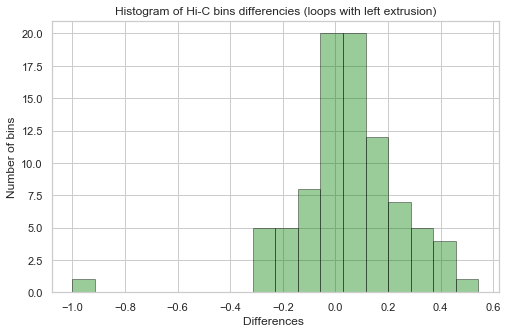

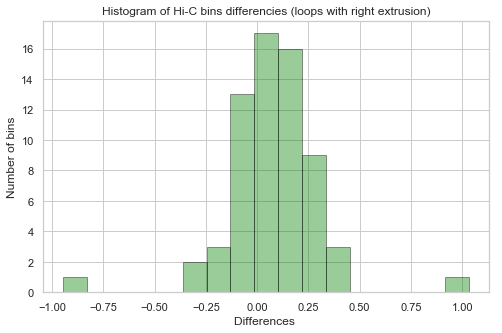

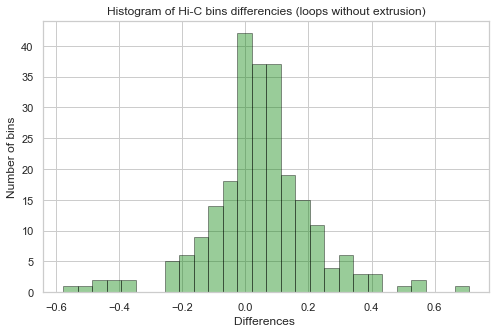

In [90]:
sns.set(style="whitegrid", rc = {'figure.figsize':(8,5)})
sns.distplot(left_extrusion_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (loops with left extrusion)')
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

sns.distplot(right_extrusion_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (loops with right extrusion)')
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

sns.distplot(not_extrusion_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (loops without extrusion)')
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

Сравнение с внутренностью треугольника

In [91]:
left_extrusion_dif, right_extrusion_dif, not_extrusion_dif = get_difs(m_0, left_extrusion_loops, right_extrusion_loops, loops_info, True)

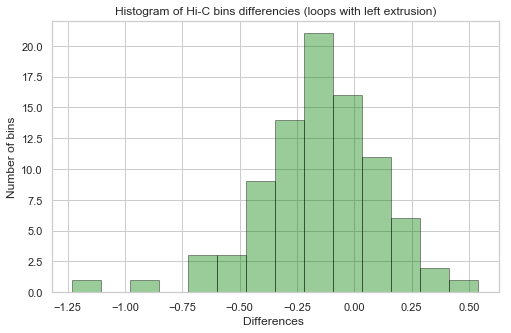

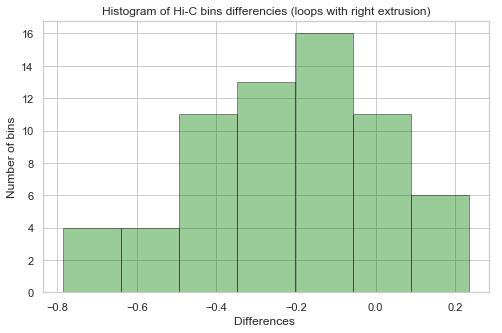

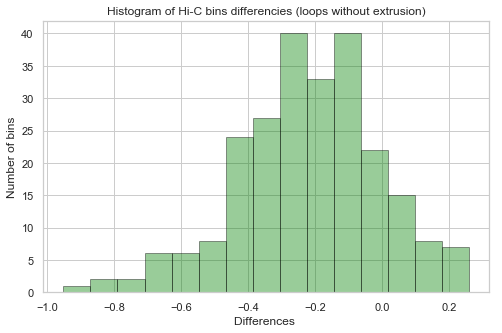

In [92]:
sns.set(style="whitegrid", rc = {'figure.figsize':(8,5)})
sns.distplot(left_extrusion_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (loops with left extrusion)')
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

sns.distplot(right_extrusion_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (loops with right extrusion)')
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

sns.distplot(not_extrusion_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (loops without extrusion)')
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

### Scatter plot - доля ненулевых бинов в полосе от петли

In [350]:
p_diffs = pd.DataFrame(columns=['dif', 'p', 'extr'])
chr_mtrs= {1: normed_mtx_chr1, 2: normed_mtx_chr2, 3: normed_mtx_chr3, \
           4: normed_mtx_chr4, 5: normed_mtx_chr5, 6: normed_mtx_chr6}
#for _,row in loops_info.iterrows():
for _,row in new_loops.iterrows():
    left = int(row['left'])#row['Genomic bin, Left base'])
    right = int(row['right'])#row['Genomic bin, Right base'])
    chrname = int(row['Chr'])
    #chr_mtx = chr_mtrs[chrname]
    chr_mtx = m[chrname][0]
    chr_mtx = np.array(chr_mtx)
    n = right - left - 1
    n_left_nonzero_dif = 0
    for i in range(left+1, right):
        if (((chr_mtx[left, i] - chr_mtx[left-1, i]) > 0.) \
            and ((chr_mtx[left, i] - chr_mtx[left+1, i]) > 0.)):
            n_left_nonzero_dif = n_left_nonzero_dif + 1

    n_right_nonzero_dif = 0
    for i in range(left+1, right):
        if (((chr_mtx[right, i] - chr_mtx[right-1, i]) > 0.) \
            and ((chr_mtx[right, i] - chr_mtx[right+1, i]) > 0.)):
            n_right_nonzero_dif = n_right_nonzero_dif + 1

    left_dif = mean_dif_up_bottom_bin(chr_mtx[left-1:right+1,left-1:right+1], True, True, False)
    right_dif = mean_dif_up_bottom_bin(chr_mtx[left:right+2,left:right+2], False, False, True)
    p_diffs = p_diffs.append({'dif': left_dif, 'p': (n_left_nonzero_dif*1.0)/n, 'extr':'left'}, ignore_index=True)
    p_diffs = p_diffs.append({'dif': right_dif, 'p': (n_right_nonzero_dif*1.0)/n, 'extr':'right'}, ignore_index=True)

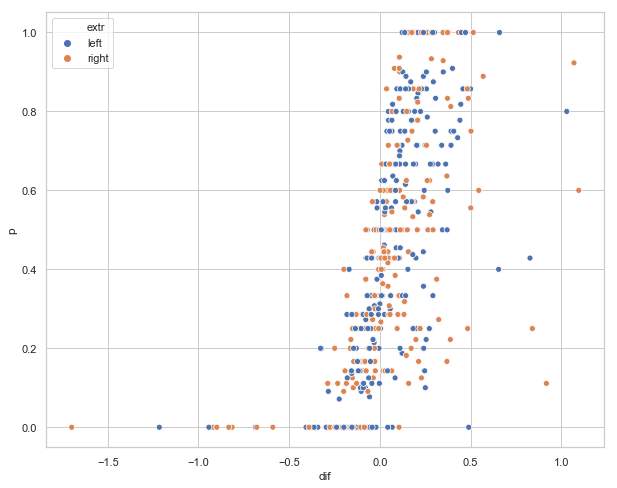

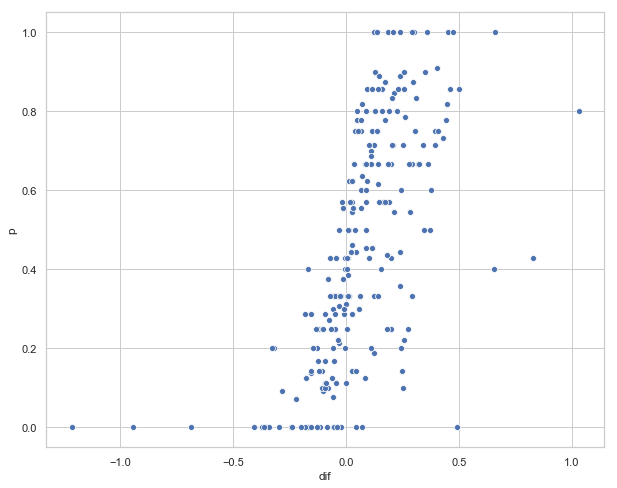

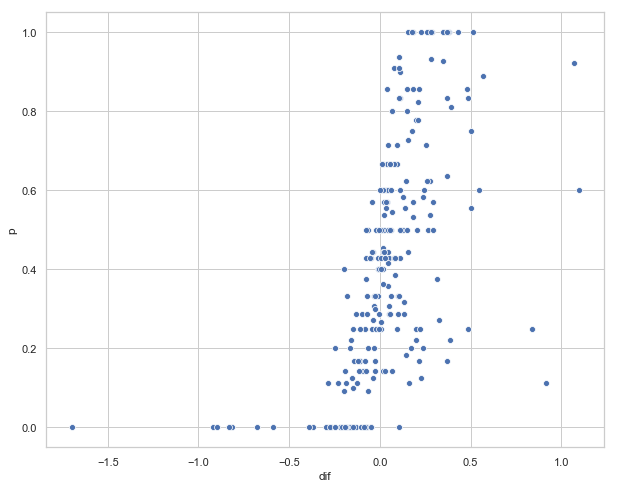

In [347]:
sns.set(style="whitegrid", rc = {'figure.figsize':(10,8)})
ax = sns.scatterplot(x="dif", y="p", hue='extr', data=p_diffs)
plt.show()
ax = sns.scatterplot(x="dif", y="p", data=p_diffs[p_diffs['extr'] == 'left'])
plt.show()
ax = sns.scatterplot(x="dif", y="p", data=p_diffs[p_diffs['extr'] == 'right'])
plt.show()

In [352]:
ex_p_dif = p_diffs[p_diffs['dif']>=threshold]
np.mean(ex_p_dif['p']), np.median(ex_p_dif['p'])

(0.6939171939171939, 0.7142857142857143)

### Статистика по новым данным

In [33]:
dr = '../data/loops/'
chr1_loops = pd.read_csv(dr + 'chr1.csv')
chr2_loops = pd.read_csv(dr + 'chr2.csv')
chr3_loops = pd.read_csv(dr + 'chr3.csv')
chr4_loops = pd.read_csv(dr + 'chr4.csv')
chr5_loops = pd.read_csv(dr + 'chr5.csv')
chr6_loops = pd.read_csv(dr + 'chr6.csv')

In [34]:
chr1_loops['Chr'] = 1
chr1_loops['left'] = chr1_loops['y (geom)']
chr1_loops['right'] = chr1_loops['x (geom)']
chr1_loops = chr1_loops[['Chr', 'left', 'right']]
chr2_loops['Chr'] = 2
chr2_loops['left'] = chr2_loops['y (geom)']
chr2_loops['right'] = chr2_loops['x (geom)']
chr2_loops = chr2_loops[['Chr', 'left', 'right']]
chr3_loops['Chr'] = 3
chr3_loops['left'] = chr3_loops['y (geom)']
chr3_loops['right'] = chr3_loops['x (geom)']
chr3_loops = chr3_loops[['Chr', 'left', 'right']]
chr4_loops['Chr'] = 4
chr4_loops['left'] = chr4_loops['y (geom)']
chr4_loops['right'] = chr4_loops['x (geom)']
chr4_loops = chr4_loops[['Chr', 'left', 'right']]
chr5_loops['Chr'] = 5
chr5_loops['left'] = chr5_loops['y (geom)']
chr5_loops['right'] = chr5_loops['x (geom)']
chr5_loops = chr5_loops[['Chr', 'left', 'right']]
chr6_loops['Chr'] = 6
chr6_loops['left'] = chr6_loops['y (geom)']
chr6_loops['right'] = chr6_loops['x (geom)']
chr6_loops = chr6_loops[['Chr', 'left', 'right']]

In [35]:
new_loops = chr1_loops.append(chr2_loops)
new_loops = new_loops.append(chr3_loops)
new_loops = new_loops.append(chr4_loops)
new_loops = new_loops.append(chr5_loops)
new_loops = new_loops.append(chr6_loops)

In [31]:
new_loops.reset_index(inplace=True)

In [36]:
new_loops.shape

(328, 3)

In [37]:
new_loops.head()

,Chr,left,right
0,1,175.0,186.0
1,1,200.0,208.0
2,1,193.0,208.0
3,1,281.0,292.0
4,1,305.0,313.0


In [43]:
normed_mtx_chr1 = np.array(mtx_chr1).copy()
normed_mtx_chr2 = np.array(mtx_chr2).copy()
normed_mtx_chr3 = np.array(mtx_chr3).copy()
normed_mtx_chr4 = np.array(mtx_chr4).copy()
normed_mtx_chr5 = np.array(mtx_chr5).copy()
normed_mtx_chr6 = np.array(mtx_chr6).copy()

Мат ожидание по всему геному на расстоянии 10 бинов от диагонали

In [97]:
mean_loop_len = np.mean(new_loops['right'] - new_loops['left'])
print 'Сред длина петли: ', mean_loop_len

Сред длина петли:  9.50304878049


In [107]:
up_dif = np.array([])
bot_dif = np.array([])
both_dif = np.array([])
chr_mtrs= {1: normed_mtx_chr1, 2: normed_mtx_chr2, 3: normed_mtx_chr3, \
           4: normed_mtx_chr4, 5: normed_mtx_chr5, 6: normed_mtx_chr6}

for i in range(1,7):
    chr_mtx = np.array(chr_mtrs[i])
    # идем по диагонали
    for j in range(1, len(chr_mtrs[i])-2):
        left = j
        right = j + int(np.round(mean_loop_len))
        chrname = 'chr' + str(chrname)
        bins_chr = bins_2000[bins_2000['chr'] == chrname]
        # кресты
        cross_pos_chr = bins_chr[((bins_chr['8B'] == 0) & (bins_chr['8A'] == 0)) & \
              ((bins_chr['5B'] == 0) & (bins_chr['5A'] == 0)) & \
              ((bins_chr['2B'] == 0) & (bins_chr['2A'] == 0)) & \
              ((bins_chr['0B'] == 0) & (bins_chr['0A'] == 0))]
        cross_positions = cross_pos_chr['start'].values
        loop_in_cross = False
        for k in range(0,6):
            left_bp = (left+i)*2000
            right_bp = (right+i)*2000
            left_bp2 = (left-i)*2000
            right_bp2 = (right-i)*2000
            if (left_bp in cross_positions) or (right_bp in cross_positions) or\
                (left_bp2 in cross_positions) or (right_bp2 in cross_positions):
                loop_in_cross = True
                print left, left+i, left-i, right, right+i, right-i, chrname
                break
        if loop_in_cross:
            continue
        #left_dif = mean_dif_up_bottom_bin(chr_mtx[left-1:right+1,left-1:right+1], True, True, False)
        right_dif = mean_dif_up_bottom_bin(chr_mtx[left:right+2, left:right+2], False, True, False)
        up_dif = np.append(right_dif, up_dif)
        bot_dif = np.append(mean_dif_up_bottom_bin(chr_mtx[left:right+2, left:right+2], False,False, True), bot_dif)
        both_dif = np.append(mean_dif_up_bottom_bin(chr_mtx[left:right+2, left:right+2], False,False, False), both_dif)
        #dif = np.append(right_dif, dif)

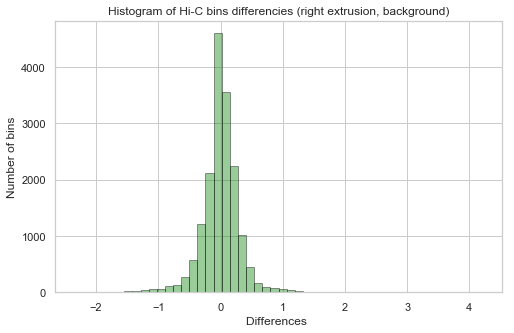

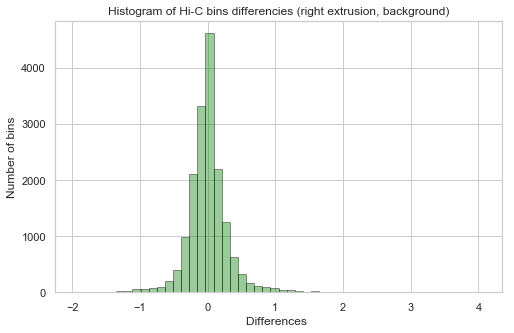

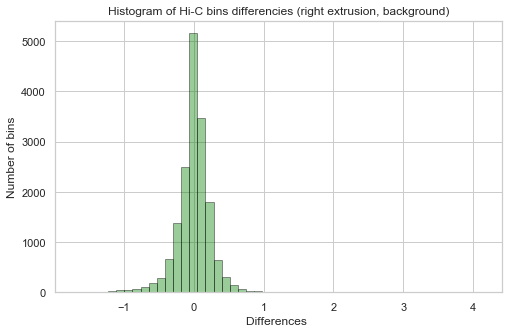

In [108]:
sns.set(style="whitegrid", rc = {'figure.figsize':(8,5)})
sns.distplot(up_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (right extrusion, background)') # new data
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

sns.set(style="whitegrid", rc = {'figure.figsize':(8,5)})
sns.distplot(bot_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (right extrusion, background)') # new data
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

sns.set(style="whitegrid", rc = {'figure.figsize':(8,5)})
sns.distplot(both_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (right extrusion, background)') # new data
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

## Extrusion tracks по стадиям

In [213]:
dr = '../data/Hi-C/'
cooler_stages = {}
for i in [0,2,5,8]:
    filename = dr + 'Dicty_' + str(i) + 'A.1000.cool.multires'
    h_A = h5py.File(filename, 'r')
    cool_A = cooler.Cooler(h_A['resolutions']['2000'])
    filename = dr + 'Dicty_' + str(i) + 'B.1000.cool.multires'
    h_B = h5py.File(filename, 'r')
    cool_B = cooler.Cooler(h_B['resolutions']['2000'])
    cooler_stages[i] = {'A': cool_A, 'B': cool_B}

m = {} # 1: {0: [], 2: [], 5: [], 8: []} - матрицы контактов по стадиям и хромосомам
for ch in range(1,7):
    m_chr_stages = {}
    chrname = 'chr' + str(ch)
    for i in [0,2,5,8]:
        c_A = cooler_stages[i]['A']
        tmp_mtx_A = c_A.matrix(balance=True, as_pixels=False)
        c_B = cooler_stages[i]['B']
        tmp_mtx_B = c_B.matrix(balance=True, as_pixels=False)
        tmp_mtx_A_chr = np.nan_to_num(observedOverExpected(tmp_mtx_A.fetch(chrname)))
        tmp_mtx_B_chr = np.nan_to_num(observedOverExpected(tmp_mtx_B.fetch(chrname)))
        
        mtx_chr = [sum(x) for x in zip(tmp_mtx_A_chr, tmp_mtx_B_chr)]
        mtx_chr = np.array([x / 2 for x in mtx_chr])
        m_chr_stages[i] = mtx_chr # {0: [], 2: [],..}
        
    m[ch] = m_chr_stages

In [1261]:
dif = np.array([])
chr_mtrs= {1: normed_mtx_chr1, 2: normed_mtx_chr2, 3: normed_mtx_chr3, \
           4: normed_mtx_chr4, 5: normed_mtx_chr5, 6: normed_mtx_chr6}
for _,row in new_loops.iterrows():
    left = int(row['left'])
    right = int(row['right'])
    chrname = int(row['Chr'])
    chr_mtx = np.array(chr_mtrs[chrname])
    chrname = 'chr' + str(chrname)
    bins_chr = bins_2000[bins_2000['chr'] == chrname]
    # кресты
    cross_pos_chr = bins_chr[((bins_chr['8B'] == 0) & (bins_chr['8A'] == 0)) & \
          ((bins_chr['5B'] == 0) & (bins_chr['5A'] == 0)) & \
          ((bins_chr['2B'] == 0) & (bins_chr['2A'] == 0)) & \
          ((bins_chr['0B'] == 0) & (bins_chr['0A'] == 0))]
    cross_positions = cross_pos_chr['start'].values
    loop_in_cross = False
    for i in range(0,6):
        left_bp = (left+i)*2000
        right_bp = (right+i)*2000
        left_bp2 = (left-i)*2000
        right_bp2 = (right-i)*2000
        if (left_bp in cross_positions) or (right_bp in cross_positions) or\
            (left_bp2 in cross_positions) or (right_bp2 in cross_positions):
            loop_in_cross = True
            print left, left+i, left-i, right, right+i, right-i, chrname
            break
    if loop_in_cross:
        continue
    #left_dif = mean_dif_up_bottom_bin(chr_mtx[left-1:right+1,left-1:right+1], True)
    right_dif = mean_dif_up_bottom_bin(chr_mtx[left:right+2, left:right+2], False)
    #dif = np.append(left_dif, dif)
    dif = np.append(right_dif, dif)

Запись в файл статистики по extrusion track по стадиям

Гистограммы по новым данным

In [308]:
new_loops['left'] = new_loops['left']-1
new_loops['right'] = new_loops['right'] -1

In [318]:
threshold = 0.25 #0.31 # 0-no extr, 1-left, 2-right, 3-both
loops_stat = pd.DataFrame(columns=['Chr', 'left', 'right', \
                                   'extrusion_0h', 'extrusion_2h', \
                                   'extrusion_5h', 'extrusion_8h', \
                                   'mean_extrusion'])
# среднее по стадиям
mtx_chrs= {1: normed_mtx_chr1, 2: normed_mtx_chr2, 3: normed_mtx_chr3, \
           4: normed_mtx_chr4, 5: normed_mtx_chr5, 6: normed_mtx_chr6}
left_dif = []
right_dif = []
left_outliers = pd.DataFrame(columns=['Chr', 'left', 'right', 'value'])
right_outliers = pd.DataFrame(columns=['Chr', 'left', 'right', 'value'])
filename = '../data/loops/loops_extrusion.csv'
heading = 'Chr;left;right;extrusion_0h;extrusion_2;extrusion_5h;extrusion_8h;mean_extrusion\n'
with open(filename, 'w') as out:
    out.write(heading)
    for _,row in new_loops.iterrows():
        left = int(row['left'])
        right = int(row['right'])
        chrname = int(row['Chr'])
        chr_mtx = m[chrname]
        chr_mtx_0 = chr_mtx[0]
        chr_mtx_2 = chr_mtx[2]
        chr_mtx_5 = chr_mtx[5]
        chr_mtx_8 = chr_mtx[8]
        chr_mtx_mean = np.array(mtx_chrs[chrname])

        left_extr = mean_dif_up_bottom_bin(chr_mtx_0[left-1:right+1,left-1:right+1], True, True, False)
        right_extr = mean_dif_up_bottom_bin(chr_mtx_0[left:right+2, left:right+2], False, False, True)
        extr_0_label = 0 if (left_extr < threshold) and (right_extr < threshold) \
                         else 1 if (right_extr < threshold) \
                         else 2 if (left_extr < threshold) \
                         else 3
        left_extr = mean_dif_up_bottom_bin(chr_mtx_2[left-1:right+1,left-1:right+1], True, True, False)
        right_extr = mean_dif_up_bottom_bin(chr_mtx_2[left:right+2, left:right+2], False, False, True)
        extr_2_label = 0 if (left_extr < threshold) and (right_extr < threshold) \
                         else 1 if (right_extr < threshold) \
                         else 2 if (left_extr < threshold) \
                         else 3
        left_extr = mean_dif_up_bottom_bin(chr_mtx_5[left-1:right+1,left-1:right+1], True, True, False)
        right_extr = mean_dif_up_bottom_bin(chr_mtx_5[left:right+2, left:right+2], False, False, True)
        extr_5_label = 0 if (left_extr < threshold) and (right_extr < threshold) \
                         else 1 if (right_extr < threshold) \
                         else 2 if (left_extr < threshold) \
                         else 3
        left_extr = mean_dif_up_bottom_bin(chr_mtx_8[left-1:right+1,left-1:right+1], True, True, False)
        right_extr = mean_dif_up_bottom_bin(chr_mtx_8[left:right+2, left:right+2], False, False, True)
        extr_8_label = 0 if (left_extr < threshold) and (right_extr < threshold) \
                         else 1 if (right_extr < threshold) \
                         else 2 if (left_extr < threshold) \
                         else 3

        left_extr = mean_dif_up_bottom_bin(chr_mtx_mean[left-1:right+1,left-1:right+1], True, True, False)
        right_extr = mean_dif_up_bottom_bin(chr_mtx_mean[left:right+2, left:right+2], False, False, True)
        extr_mean_label = 0 if (left_extr < threshold) and (right_extr < threshold) \
                         else 1 if (right_extr < threshold) \
                         else 2 if (left_extr < threshold) \
                         else 3
        # outliers
        if (left_extr < 0.):
            left_outliers = left_outliers.append({'Chr': chrname, 'left': left, \
                                                 'right': right, 'value': left_extr}, \
                                                 ignore_index=True)
        if (right_extr < 0.):
            right_outliers = right_outliers.append({'Chr': chrname, 'left': left, \
                                                 'right': right, 'value': right_extr}, \
                                                 ignore_index=True)
        left_dif.append(left_extr)
        right_dif.append(right_extr)

        loops_stat = loops_stat.append({'Chr': chrname, 'left': left, 'right': right, \
                                        'extrusion_0h': extr_0_label, \
                                        'extrusion_2h': extr_2_label,\
                                        'extrusion_5h': extr_5_label,\
                                        'extrusion_8h': extr_8_label, \
                                        'mean_extrusion': extr_mean_label}, ignore_index=True)
        out.write('chr' + str(chrname) + ';' + str(left) + ';' + str(right) + ';' + \
                  str(extr_0_label) + ';' + str(extr_2_label) + ';' + str(extr_5_label) + ';' + \
                  str(extr_8_label) + ';' + str(extr_mean_label) + '\n')

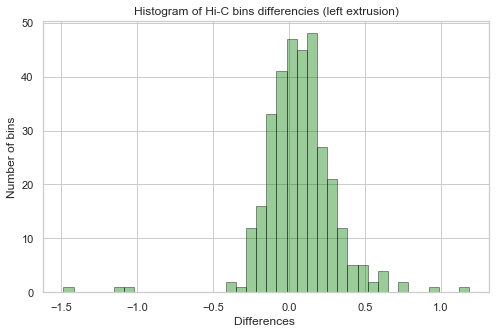

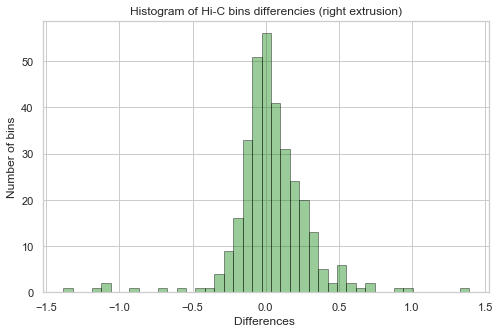

In [311]:
sns.set(style="whitegrid", rc = {'figure.figsize':(8,5)})
sns.distplot(left_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (left extrusion)') # new data
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

sns.set(style="whitegrid", rc = {'figure.figsize':(8,5)})
sns.distplot(right_dif, kde=False,
             color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Hi-C bins differencies (right extrusion)') # new data
plt.xlabel('Differences ')
plt.ylabel('Number of bins')
plt.show()

In [312]:
loops_stat

,Chr,left,right,extrusion_0h,extrusion_2h,extrusion_5h,extrusion_8h,mean_extrusion
0,1,175,186,0,0,0,0,0
1,1,200,208,0,1,3,1,1
2,1,193,208,3,3,3,3,3
3,1,281,292,0,0,0,0,0
4,1,305,313,0,0,0,0,0
5,1,445,452,0,1,1,0,1
6,1,584,593,0,0,0,0,0
7,1,606,614,2,3,3,3,2
8,1,629,636,0,0,0,0,0
9,1,624,636,0,1,3,0,1


In [1294]:
loops_with_changed_extr = pd.DataFrame(columns=loops_stat.columns.values)
for _,row in loops_stat.iterrows():
    chrname = row['Chr']
    left = row['left']
    right = row['right']
    ex_0 = row['extrusion_0h']
    ex_2 = row['extrusion_2h']
    ex_5 = row['extrusion_5h']
    ex_8 = row['extrusion_8h']
    if (len(np.unique([ex_0, ex_2, ex_5, ex_8])) != 1):
        loops_with_changed_extr = loops_with_changed_extr.append(row)

In [1295]:
loops_with_changed_extr

,Chr,left,right,extrusion_0h,extrusion_2h,extrusion_5h,extrusion_8h,mean_extrusion
2,1,193,208,2,1,2,0,2
11,1,659,665,0,2,2,2,2
12,1,665,672,0,1,1,1,1
15,1,742,752,0,0,0,2,0
16,1,833,844,0,0,2,0,0
21,1,1149,1156,0,3,0,2,0
27,1,1395,1407,0,2,2,2,2
28,1,1439,1449,0,3,3,2,1
31,1,1715,1726,2,0,0,0,0
33,1,1838,1848,2,0,0,0,0


In [109]:
loops_info

,Chr,ID,"Genomic bin, Left base","Genomic bin, Right base",Size (Kb),"""Extrusion track""","Note for extrusion tracks: 0=n/a, 1=from the left base, 2=from the right base"
0,1,1,107,114,16,0,NaN
1,1,2,114,123,20,1,NaN
2,1,3,176,187,24,2,NaN
3,1,4,187,194,16,0,NaN
4,1,5,194,209,32,2,NaN
5,1,6,201,209,18,2,NaN
6,1,7,209,215,14,1,NaN
7,1,8,226,239,28,1,NaN
8,1,9,239,253,30,1,NaN
9,1,10,268,272,10,0,NaN


In [220]:
# Сдвнуть ли разметку
for _,row in left_extrusion_loops.iterrows():
    chrname = int(row['Chr'])
    left = int(row['Genomic bin, Left base'])
    right = int(row['Genomic bin, Right base'])
    print chrname, left, right, mean_dif_up_bottom_bin(m[chrname][0][left-1:right+1, left-1:right+1],
                                             True, True, False)

1 114 123 0.016135947241759152
1 209 215 -0.17978742880834028
1 226 239 -0.266039491543828
1 239 253 -0.44172623621749835
1 282 293 0.0003562709851938628
1 293 304 0.04416732072688023
1 314 329 0.04493355522833098
1 384 394 -0.12963837463048056
1 505 515 0.008008951731211522
1 607 615 -0.02610161713401804
1 649 658 -0.10998599621262173
1 660 666 -0.16427212063717034
1 743 753 -0.2656826294680018
1 834 845 -0.5023668537009904
1 902 912 -0.06017760037514064
1 913 924 -0.02966275868667989
1 924 933 -0.013631080162098241
1 948 963 0.0
1 1103 1126 0.0
1 1127 1132 -0.40161482303265217
1 1150 1160 -0.19942064309155116
1 1160 1170 -0.11057412178127934
1 1172 1180 -0.304335245233914
1 1291 1305 -0.2576846640222142
1 1317 1322 -0.07062129439313192
1 1384 1392 -0.34917523433843334
1 1419 1424 -0.41541205663932945
1 1440 1450 -0.24069535861334412
1 1450 1462 -0.3345808342241465
1 1469 1478 -0.353780577316686
1 1496 1504 -0.30230426020400764
1 1539 1555 -0.009576241407082131
1 1571 1577 -0.03637270

In [304]:
# Сдвнуть ли разметку новых данных
for _,row in new_loops.iterrows():
    chrname = int(row['Chr'])
    left = int(row['left'])
    right = int(row['right'])
    print chrname, left, right, mean_dif_up_bottom_bin(mtx_chrs[chrname][left-1:right+1, left-1:right+1],
                                             True, True, False)

1 176 187 -0.015293110858102699
1 201 209 -0.09901160577280232
1 194 209 -0.12680821783781548
1 282 293 0.05571361671915054
1 306 314 0.12025242480471549
1 446 453 -0.032039585163347706
1 585 594 -0.2555370234431579
1 607 615 -0.14515702769872307
1 630 637 -0.010801544406907726
1 625 637 -0.040142766953429776
1 649 658 -0.24003666647916022
1 660 666 -0.14232061881730623
1 666 673 -0.21760378137876302
1 704 714 0.17380776804899095
1 725 732 0.03646179143288353
1 743 753 -0.24097998696394107
1 834 845 -0.4366957287768449
1 1072 1080 -0.5967227483092896
1 1085 1091 0.2905302893751066
1 1103 1126 0.08057054939411967
1 1141 1149 -0.04921482193512372
1 1150 1157 -0.07781941135673454
1 1291 1305 -0.3357005445946479
1 1322 1329 0.0013769228158507785
1 1305 1317 -0.11468811576902255
1 1372 1381 -0.032732850140286374
1 1384 1392 -0.3918046947967841
1 1396 1408 0.11568969930378009
1 1440 1450 -0.24317505957905117
1 1639 1645 -0.46431555710958117
1 1671 1678 -0.18367479899173134
1 1716 1727 0.1187

6 52 60 -0.22159319758602103
6 35 46 0.052625714253312195
6 128 137 -0.11689224501926443
6 138 149 0.03324413200688292
6 222 232 0.08705507664879353
6 383 389 -0.3190179085686714
6 390 403 -0.38458262245586927
6 465 474 -0.0038724755351884355
6 478 486 -0.09082181877937714
6 486 497 -0.14409934330532148
6 516 525 -0.014072200314742211
6 641 649 -0.10116937669181067
6 819 833 0.07153594111808387
6 834 841 -0.06206929667895733
6 903 918 0.008129801081383059
6 927 935 0.05306901952388171
6 1075 1083 0.06209080857782484
6 1089 1101 -0.1431387635185548
6 1111 1119 -0.05020194589785365
6 1135 1144 -0.07974422630948885
6 1334 1345 0.07923708160671361
6 1328 1345 3.911229242770098e-05
6 1350 1359 -0.27732153293837725
6 1504 1514 -0.07317066631131192
6 1513 1523 -0.022756056013267967


In [268]:
no_extrusion_loops.head()

,Chr,ID,"Genomic bin, Left base","Genomic bin, Right base",Size (Kb),"""Extrusion track""","Note for extrusion tracks: 0=n/a, 1=from the left base, 2=from the right base"
0,1,1,107,114,16,0,NaN
3,1,4,187,194,16,0,NaN
9,1,10,268,272,10,0,NaN
10,1,11,275,282,16,0,NaN
17,1,18,446,453,16,0,NaN


In [319]:
left_outliers

,Chr,left,right,value
0,1.0,305.0,313.0,-0.181555
1,1.0,584.0,593.0,-0.186674
2,1.0,629.0,636.0,-0.279319
3,1.0,703.0,713.0,-0.050909
4,1.0,742.0,752.0,-0.038447
5,1.0,833.0,844.0,-0.321284
6,1.0,1071.0,1079.0,-0.099768
7,1.0,1084.0,1090.0,-0.151198
8,1.0,1102.0,1125.0,-0.154828
9,1.0,1290.0,1304.0,-0.030455


Смещение карты

In [164]:
ex = pd.read_csv('../data/loops/loops_extrusion.csv', ';')
ex[ex['mean_extrusion'] == 0]

,Chr,left,right,extrusion_0h,extrusion_2,extrusion_5h,extrusion_8h,mean_extrusion
1,chr1,200,208,0,0,0,0,0
3,chr1,281,292,0,0,0,0,0
4,chr1,305,313,0,0,0,0,0
5,chr1,445,452,0,0,0,0,0
6,chr1,584,593,0,0,0,0,0
8,chr1,629,636,0,0,0,0,0
9,chr1,624,636,0,0,0,0,0
10,chr1,648,657,0,0,0,0,0
13,chr1,703,713,0,0,0,0,0
15,chr1,742,752,0,0,0,2,0


In [1553]:
loops_ex = ex[(ex['mean_extrusion'] == 2)] 
mx = 0.
max_left = -1
max_right= -1
max_ch= -1
for _, row in loops_ex.iterrows():
    left = int(row['left'])#281#193#1439
    right = int(row['right'])#292#208#1449
    ch = int(row['Chr'][3:])
    chr_mtx = chr_mtrs[ch]
    if np.mean(chr_mtx[left:right+2, right+2]) == 0.:
        continue
    chr_mtx_2 = chr_mtx[left:right+2, left:right+2] #  [left-1, right]
    dif = mean_dif_up_bottom_bin(chr_mtx_2, False)
    if (dif > mx):
        mx = dif
        max_left = left
        max_right= right
        max_ch= ch

In [205]:
loops_ex = ex[ex['mean_extrusion'] == 1]
mx = 5
max_left = -1
max_right= -1
max_ch= -1
for _, row in loops_ex.iterrows():
    left = int(row['left'])#281#193#1439
    right = int(row['right'])#292#208#1449
    ch = int(row['Chr'][3:])
    chr_mtx = chr_mtrs[ch]
    if np.sum(chr_mtx[left-1:, left-1:]) == 0:
        continue
    chr_mtx_2 = chr_mtx[left-1:right+1, left-1:right+1] #  [left-1, right]
    dif = mean_dif_up_bottom_bin(chr_mtx_2, True, True, False)
    if (dif > 0.3):
        print ch, left, right, dif
        mx = dif
        max_left = left
        max_right= right
        max_ch= ch

1 1439 1449 0.30091974544732464
2 406 417 0.4860535524788322
2 2909 2921 0.7825432556753785
3 979 990 0.37875779306343194
3 1854 1859 0.7305336970213514
3 2331 2338 0.9644573941743606
3 2445 2452 0.48706089845389056
3 2542 2550 0.3874642700946614
4 284 290 0.6102646844901499
4 956 965 0.603060582750416
4 1390 1401 1.1869664305315224
4 2704 2711 0.34664018863295376
5 578 589 0.32818286657550044
5 1210 1220 0.5224333164509689
5 1734 1749 0.6485465982897962
6 382 388 0.3691727166491944


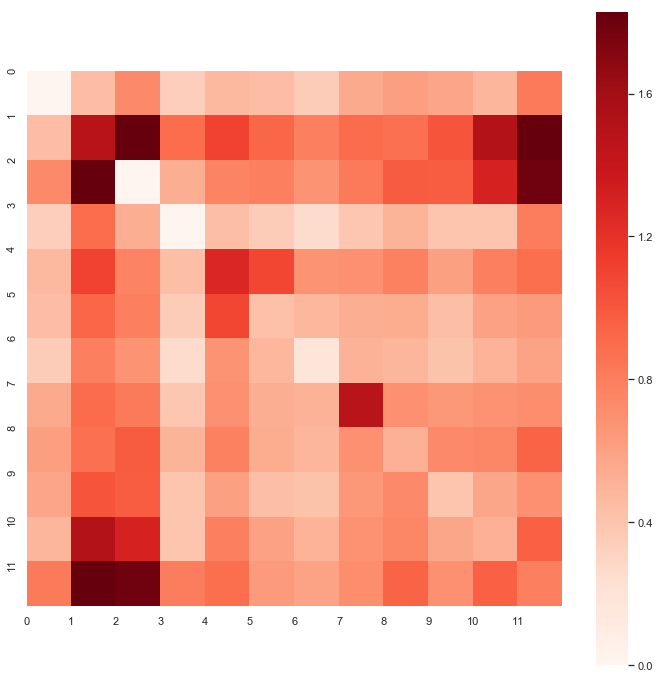

In [207]:
left = 1210#193#1924#281#193#1439
right = 1220#208#1933
chr_mtx = chr_mtrs[5]#m[1][0]
chr_mtx_2 = chr_mtx[left-1:right+1, left-1:right+1]
n = right-left+2
plt.figure(figsize=[n, n])
sns.heatmap(chr_mtx_2, cmap='Reds', vmax=np.max(chr_mtx_2), vmin=np.min(chr_mtx_2), square=True)
plt.yticks(np.arange(n), np.arange(n))
plt.xticks(np.arange(n), np.arange(n))
plt.show()